# Apply LDA to the paragraph set to identify candidate topics

## Data wrangling
### Clean up paragraph text data. Remove punctuation; lowercase the text.

In [1]:
import pandas as pd
import string

# data wrangling/cleaning
paragraphs_df = pd.read_csv('election_paragraphs.csv', delimiter = '///', engine = 'python')

# remove punctuation
paragraphs_df['Paragraph'] = paragraphs_df['Paragraph'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

# lowercase paragraph text
paragraphs_df = paragraphs_df.apply(lambda x: x.str.lower())

### Results

In [2]:
paragraphs_df

,Date,Paragraph
0,2000-05-01,following are excerpts from remarks prepared f...
1,2000-05-01,from what we can tell of his foreign policy go...
2,2000-05-01,governor bush dangerously fixates on the cold ...
3,2000-05-01,stuck in a cold war mindset governor bush cont...
4,2000-05-01,just this past week governor bush used his bri...
...,...,...
3168,2000-07-02,thats not to say that mr gores answers were ve...
3169,2000-07-02,mr gore is not alone in having questions raise...
3170,2000-07-02,mr gore was in fact tolerably forthcoming as f...
3171,2000-07-02,but in the face of an impressive series of doc...


### Visualization

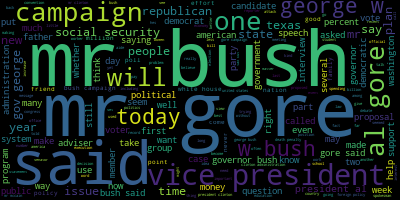

In [3]:
from wordcloud import WordCloud

all_paragraphs = ' '.join(list(paragraphs_df['Paragraph'].values))
wordcloud = WordCloud(max_words = 300)
wordcloud.generate(all_paragraphs)
wordcloud.to_image()

### Vectorizing the text

In [4]:
import pandas as pd

# helper function: returns the k most frequently appearing keywords in the dataframe
def top_k(data_df, vec, k):
    X = vec.fit_transform(data_df['Paragraph'].values)
    labels = vec.get_feature_names()
    
    return pd.DataFrame(columns = labels, data = X.toarray()).sum().sort_values(ascending = False)[:k]

In [5]:
## generate feature vectors
from sklearn.feature_extraction.text import CountVectorizer 

vec = CountVectorizer(decode_error = 'ignore', stop_words = 'english')
X = vec.fit_transform(paragraphs_df['Paragraph'].values)

#### Most frequent terms over all paragraphs

In [6]:
top_terms = top_k(paragraphs_df, vec, 30)

top_terms

mr              4017
bush            2046
gore            1863
said            1389
president        787
campaign         604
bushs            548
vice             478
gores            467
george           432
al               377
security         355
governor         345
today            331
republican       328
social           327
texas            315
new              290
people           266
clinton          248
gov              246
plan             241
years            240
like             238
national         230
presidential     220
political        213
policy           204
tax              204
did              203
dtype: int64

## Topic modeling with LDA

In [7]:
# helper function: prints the top k candidate topics
def print_topics(topic_model, vec, k):
    terms = vec.get_feature_names()
    for topic_idx, topic in enumerate(topic_model.components_):
        print("Topic #%d:" %topic_idx)
        print(" ".join([terms[i] for i in topic.argsort()[:-k - 1:-1]]) + '\n')

In [8]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

tn = 30
lda = LDA(n_components = tn)
lda.fit(X)

LatentDirichletAllocation(n_components=30)

### Candidate topics

In [9]:
print_topics(lda, vec, 10)

Topic #0:
mr bush gore bushs said campaign like way clinton president

Topic #1:
mr gore gores said bush president vice al republican new

Topic #2:
mr bush gore said president george texas governor gov vice

Topic #3:
mr bush gore campaign said president bushs governor vice right

Topic #4:
mr bush gore president said campaign gores vice oil people

Topic #5:
mr bush said gore president governor republicans george republican campaign

Topic #6:
mr gore bush said president george issue vice democratic presidential

Topic #7:
gore president mr campaign al national gorence vice nuclear gores

Topic #8:
mr said gore bush president vice party gores like al

Topic #9:
social security mr plan retirement bush gore stock market bushs

Topic #10:
mr bush said gore president oil bushs today george issue

Topic #11:
gore mr campaign gores bush said conrad vice al temple

Topic #12:
mr gore bush said like political house national al campaign

Topic #13:
mr gore bush said campaign president voters 